# "Credit Card Customer Segmentation and Strategy Analysis"

### Business Need:
In today's competitive market, understanding and effectively catering to the diverse behaviors and preferences of customers is crucial for businesses. Personalized offerings and targeted marketing strategies have become essential to retain and attract customers. To achieve this, a robust methodology for grouping customers based on their behaviors is needed, allowing businesses to tailor their approaches and offerings accordingly.

### Objective:
The primary objective of this analysis is to segment credit card holders into distinct groups based on their behavioral patterns. This segmentation aims to enhance the understanding of customers' needs, preferences, and spending behaviors. By categorizing customers into meaningful clusters, the objective is to enable businesses to implement more effective and personalized marketing strategies, thereby increasing customer satisfaction, engagement, and overall profitability.

### Methodology:
To achieve the above objective, the k-means clustering algorithm will be employed. This algorithm partitions customers into clusters based on their similarity in behavioral attributes such as purchase frequency, purchase amounts, balance, and payment patterns. K-means seeks to create groups that are internally cohesive yet distinct from each other. By iteratively optimizing cluster centroids, the algorithm will group credit card holders in a way that maximizes the homogeneity within clusters and heterogeneity between clusters.



Dataset: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

 The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

| Feature                          | Details                                                |
|----------------------------------|--------------------------------------------------------|
| CUST_ID                          | Identification of Credit Card holder (Categorical)    |
| BALANCE                          | Balance amount left in their account to make purchases |
| BALANCE_FREQUENCY                | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| PURCHASES                        | Amount of purchases made from account                 |
| ONEOFF_PURCHASES                 | Maximum purchase amount done in one-go                |
| INSTALLMENTS_PURCHASES           | Amount of purchase done in installment               |
| CASH_ADVANCE                     | Cash in advance given by the user                     |
| PURCHASES_FREQUENCY              | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY         | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASESINSTALLMENTSFREQUENCY   | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| CASHADVANCEFREQUENCY             | How frequently the cash in advance being paid        |
| CASHADVANCETRX                   | Number of Transactions made with "Cash in Advanced"  |
| PURCHASES_TRX                    | Number of purchase transactions made                 |
| CREDIT_LIMIT                     | Limit of Credit Card for user                         |
| PAYMENTS                         | Amount of Payment done by user                        |
| MINIMUM_PAYMENTS                 | Minimum amount of payments made by user               |
| PRCFULLPAYMENT                   | Percent of full payment paid by user                  |
| TENURE                           | Tenure of credit card service for user                |


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
dataset = pd.read_csv('Credit_Card_Dataset.csv')

In [3]:
#shape of dataset
dataset.shape

(8950, 18)

In [4]:
#dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#making a copy of dataset before proceeding for analysis
df = dataset.copy()

In [6]:
# finding null values

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
## THere are null values in dataset in CREDIT_LIMIT, MINIMUM_PAYMENTS columns
# filling null values with mean

# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [8]:
# checking null values
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [10]:
len(df.columns)

18

In [11]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
#descroptive statistics
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


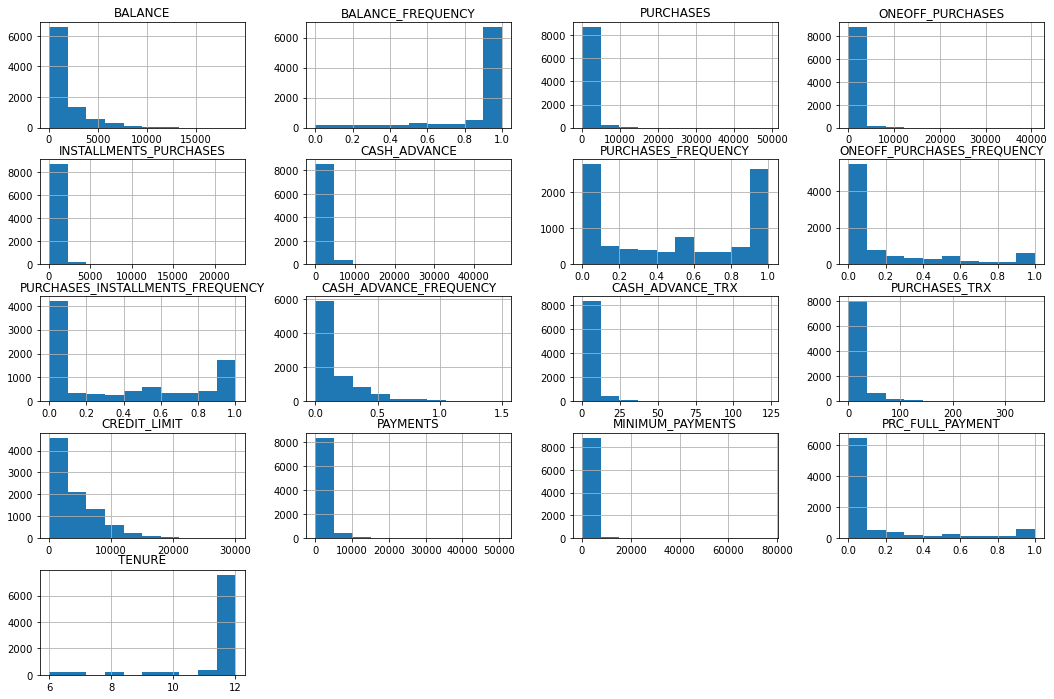

In [13]:
#Distribution of features in the dataset
df.hist(figsize=(18,12))
plt.show()

<span style='color:Blue'>*Observation*  </span>:

1. **Balance Analysis:**
   - The average balance left in the account (BALANCE) is approximately $1564.47, with  a  wide  standard  deviation  of 2081.53, indicating variability in account balances.
   - About 25% of customers have a balance of less than 128.28, while 75% have a balance of less than 2054.14.
   - The maximum balance is quite high at 19043.14.

2. **Purchase Behavior:**
   - On average, customers make purchases (PURCHASES) amounting to around $1003.20.
   - The distribution of purchase amounts is highly variable, as evidenced by the large standard deviation of 2136.63.
   - The maximum purchase amount is notably high at 49039.57.

3. **Cash Advance Usage:**
   - The average cash advance amount (CASH_ADVANCE) is about 978.87,  with  a  standard deviation  of  2097.16.
   - Many customers have never used cash advances, as indicated by the minimum value of 0 and a substantial number of zero values.
   - The maximum cash advance amount is significantly high at $47137.21.

4. **Frequency of Transactions:**
   - On average, customers make purchases approximately 0.49 times per month (PURCHASES_FREQUENCY).
   - The frequency of one-off purchases (ONEOFF_PURCHASES_FREQUENCY) and purchases in installments (PURCHASES_INSTALLMENTS_FREQUENCY) also varies, with mean values of 0.20 and 0.36, respectively.
   - Cash advance transactions (CASH_ADVANCE_TRX) are less frequent on average, with a mean value of around 3.25 transactions.

5. **Credit and Payment Behavior:**
   - The average credit limit (CREDIT_LIMIT) is approximately 4494.45, with a substantial standard deviation of 3638.82.
   - Payments (PAYMENTS) made by customers vary widely, with an average of around 1733.14 and a large standard deviation of 2895.06.
   - The percentage of full payment made (PRC_FULL_PAYMENT) by customers on average is about 15.37%, with a moderate standard deviation of 0.292.

6. **Tenure and Minimum Payments:**
   - The average tenure of credit card service (TENURE) is approximately 11.52 months, with a relatively low standard deviation of 1.34.
   - The average minimum payment (MINIMUM_PAYMENTS) is around 864.21, but this metric has a high standard deviation of $2372.45.



In [14]:

# Load your data into a pandas DataFrame (replace 'data.csv' with your actual data file)
data = df

# Calculate the average purchase amount for customers with one-off purchases and those with installment purchases
oneoff_avg_purchase = data[data['ONEOFF_PURCHASES'] > 0]['PURCHASES'].mean()
installments_avg_purchase = data[data['INSTALLMENTS_PURCHASES'] > 0]['PURCHASES'].mean()

print("Average Purchase Amount for One-off Purchases:", oneoff_avg_purchase)
print("Average Purchase Amount for Installment Purchases:", installments_avg_purchase)

# Calculate the average purchase amount for customers who frequently use cash advances and those who don't
frequent_cash_advance_avg_purchase = data[data['CASH_ADVANCE_FREQUENCY'] > 0]['PURCHASES'].mean()
no_cash_advance_avg_purchase = data[data['CASH_ADVANCE_FREQUENCY'] == 0]['PURCHASES'].mean()

print("Average Purchase Amount for Customers with Frequent Cash Advances:", frequent_cash_advance_avg_purchase)
print("Average Purchase Amount for Customers with No Cash Advances:", no_cash_advance_avg_purchase)


Average Purchase Amount for One-off Purchases: 1670.6711983648913
Average Purchase Amount for Installment Purchases: 1490.7224553039339
Average Purchase Amount for Customers with Frequent Cash Advances: 633.8183387320687
Average Purchase Amount for Customers with No Cash Advances: 1348.1677614520315


<span style='color:Blue'>*Observation*  </span>:

1. **Average Purchase Amount for One-off Purchases (1670.67):**
   Customers who make one-off purchases (larger individual purchases) have an average purchase amount of approximately $1670.67. This suggests that customers who tend to make occasional significant purchases have a higher average spending per transaction.

2. **Average Purchase Amount for Installment Purchases (1490.72):**
   Customers who make installment purchases (smaller purchases spread over multiple payments) have an average purchase amount of approximately $1490.72. This implies that customers who prefer spreading their expenses across installments have a slightly lower average spending per transaction compared to one-off purchases.

3. **Average Purchase Amount for Customers with Frequent Cash Advances (633.82):**
   Customers who frequently use cash advances have an average purchase amount of approximately $633.82. This indicates that customers who rely on cash advances more often tend to have lower average spending on regular purchases.

4. **Average Purchase Amount for Customers with No Cash Advances (1348.17):**
   Customers who do not use cash advances at all have a higher average purchase amount of approximately $1348.17. This suggests that customers who avoid cash advances tend to have a higher average spending on their purchases.

* Customers who make one-off purchases and those who avoid cash advances tend to have higher average purchase amounts, while those who frequently use cash advances have relatively lower average spending per transaction.

In [15]:

data =df

# Analyze how often customers make full payments (PRCFULLPAYMENT)
full_payment_count = data[data['PRC_FULL_PAYMENT'] == 1]['CUST_ID'].count()
total_customers = data['CUST_ID'].count()
full_payment_percentage = (full_payment_count / total_customers) * 100

print("Percentage of Customers Making Full Payments:", full_payment_percentage)

# Compare average payments (PAYMENTS) with minimum payments (MINIMUM_PAYMENTS)
average_payments = data['PAYMENTS'].mean()
average_minimum_payments = data['MINIMUM_PAYMENTS'].mean()

print("Average Payments:", average_payments)
print("Average Minimum Payments:", average_minimum_payments)


Percentage of Customers Making Full Payments: 5.4525139664804465
Average Payments: 1733.1438520248041
Average Minimum Payments: 864.2065423050761


<span style='color:Blue'>*Observation*  </span>:

A significant portion of customers do not make full payments, and the average payment amount is higher than the average minimum payment. This could indicate that many customers are making payments that exceed the minimum required amount, but a majority still have balances left on their credit cards. 

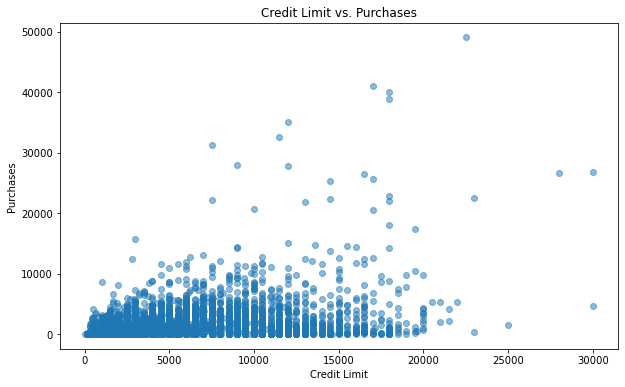

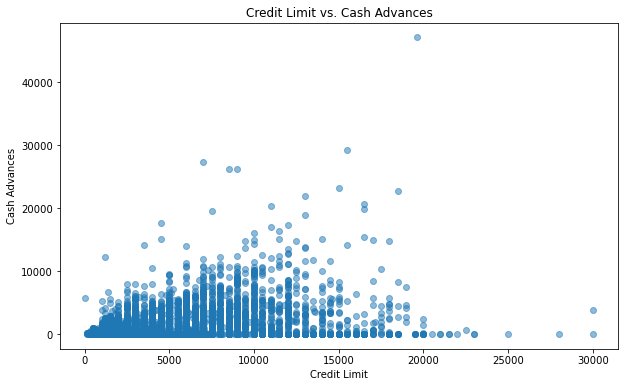

In [16]:
# Load your data into a pandas DataFrame (replace 'data.csv' with your actual data file)
data = df

# Create a scatter plot to visualize the relationship between credit limit and purchases
plt.figure(figsize=(10, 6))
plt.scatter(data['CREDIT_LIMIT'], data['PURCHASES'], alpha=0.5)
plt.title('Credit Limit vs. Purchases')
plt.xlabel('Credit Limit')
plt.ylabel('Purchases')
plt.show()

# Create a scatter plot to visualize the relationship between credit limit and cash advances
plt.figure(figsize=(10, 6))
plt.scatter(data['CREDIT_LIMIT'], data['CASH_ADVANCE'], alpha=0.5)
plt.title('Credit Limit vs. Cash Advances')
plt.xlabel('Credit Limit')
plt.ylabel('Cash Advances')
plt.show()


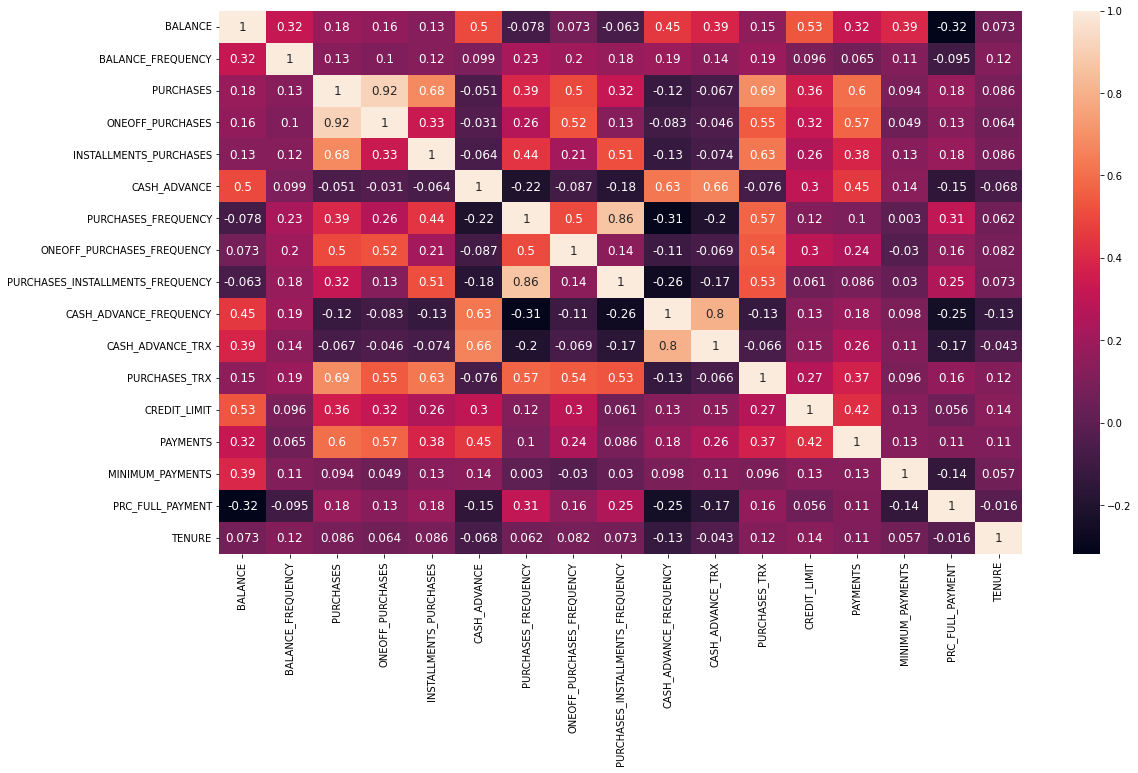

In [17]:
# The correlation matrix measures the linear relationship between pairs of variables in the DataFrame.
fig, ax = plt.subplots(figsize=(18, 10))
 
# drawing the plot
sns.heatmap(data=df.corr(),annot=True, annot_kws={"size": 12}) 
plt.show()

In [18]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

## Clustering using K-means, Agglomerative , GMM models

In [19]:
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [20]:

# Load your data into a DataFrame
data = df  # Replace with the path to your data file

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Range of clusters to consider
min_clusters = 2
max_clusters = 10

# Lists to store evaluation scores
kmeans_scores = []
agg_scores = []
gmm_scores = []
davies_bouldin_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    # K-means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_clusters = kmeans.fit_predict(scaled_data)
    kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
    kmeans_db = davies_bouldin_score(scaled_data, kmeans_clusters)
    kmeans_scores.append(kmeans_silhouette)
    davies_bouldin_scores.append(kmeans_db)
    print(f"K-means: n_clusters={n_clusters}, Silhouette Score={kmeans_silhouette:.4f}, Davies-Bouldin Index={kmeans_db:.4f}")
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agg_clusters = agglomerative.fit_predict(scaled_data)
    agg_silhouette = silhouette_score(scaled_data, agg_clusters)
    agg_db = davies_bouldin_score(scaled_data, agg_clusters)
    agg_scores.append(agg_silhouette)
    davies_bouldin_scores.append(agg_db)
    print(f"Agglomerative: n_clusters={n_clusters}, Silhouette Score={agg_silhouette:.4f}, Davies-Bouldin Index={agg_db:.4f}")
    
    # Gaussian Mixture Model (GMM) Clustering
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_clusters = gmm.fit_predict(scaled_data)
    gmm_silhouette = silhouette_score(scaled_data, gmm_clusters)
    gmm_db = davies_bouldin_score(scaled_data, gmm_clusters)
    gmm_scores.append(gmm_silhouette)
    davies_bouldin_scores.append(gmm_db)
    print(f"GMM: n_clusters={n_clusters}, Silhouette Score={gmm_silhouette:.4f}, Davies-Bouldin Index={gmm_db:.4f}")
    
    print("=" * 40)


K-means: n_clusters=2, Silhouette Score=0.2095, Davies-Bouldin Index=1.9122
Agglomerative: n_clusters=2, Silhouette Score=0.1775, Davies-Bouldin Index=2.0626
GMM: n_clusters=2, Silhouette Score=0.1855, Davies-Bouldin Index=2.2847
K-means: n_clusters=3, Silhouette Score=0.2505, Davies-Bouldin Index=1.5976
Agglomerative: n_clusters=3, Silhouette Score=0.1731, Davies-Bouldin Index=1.7979
GMM: n_clusters=3, Silhouette Score=0.0997, Davies-Bouldin Index=3.0027
K-means: n_clusters=4, Silhouette Score=0.1976, Davies-Bouldin Index=1.5752
Agglomerative: n_clusters=4, Silhouette Score=0.1547, Davies-Bouldin Index=1.7762
GMM: n_clusters=4, Silhouette Score=0.1016, Davies-Bouldin Index=2.4111
K-means: n_clusters=5, Silhouette Score=0.1932, Davies-Bouldin Index=1.5494
Agglomerative: n_clusters=5, Silhouette Score=0.1581, Davies-Bouldin Index=1.5884
GMM: n_clusters=5, Silhouette Score=0.0728, Davies-Bouldin Index=2.7850
K-means: n_clusters=6, Silhouette Score=0.2026, Davies-Bouldin Index=1.5047
Aggl

## Clustering using K-means, Agglomerative , GMM models with PCA

In [21]:

# Load your data into a DataFrame
data = df  # Replace with the path to your data file

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # You can choose the number of components you want to keep
pca_data = pca.fit_transform(scaled_data)

# Range of clusters to consider
min_clusters = 2
max_clusters = 10

# Lists to store evaluation scores
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    print(f"Number of Clusters: {n_clusters}")
    result = {'num_clusters': n_clusters}
    
    # K-means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_clusters = kmeans.fit_predict(pca_data)
    silhouette_kmeans = silhouette_score(pca_data, kmeans_clusters)
    davies_bouldin_kmeans = davies_bouldin_score(pca_data, kmeans_clusters)
    result['kmeans_silhouette'] = silhouette_kmeans
    result['kmeans_davies_bouldin'] = davies_bouldin_kmeans
    print(f"K-means - Silhouette Score: {silhouette_kmeans}, Davies-Bouldin Index: {davies_bouldin_kmeans}")
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agg_clusters = agglomerative.fit_predict(pca_data)
    silhouette_agg = silhouette_score(pca_data, agg_clusters)
    davies_bouldin_agg = davies_bouldin_score(pca_data, agg_clusters)
    result['agg_silhouette'] = silhouette_agg
    result['agg_davies_bouldin'] = davies_bouldin_agg
    print(f"Agglomerative - Silhouette Score: {silhouette_agg}, Davies-Bouldin Index: {davies_bouldin_agg}")
    
    # Gaussian Mixture Model (GMM) Clustering
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_clusters = gmm.fit_predict(pca_data)
    silhouette_gmm = silhouette_score(pca_data, gmm_clusters)
    davies_bouldin_gmm = davies_bouldin_score(pca_data, gmm_clusters)
    result['gmm_silhouette'] = silhouette_gmm
    result['gmm_davies_bouldin'] = davies_bouldin_gmm
    print(f"GMM - Silhouette Score: {silhouette_gmm}, Davies-Bouldin Index: {davies_bouldin_gmm}")
    
    print("=" * 40)
    results.append(result)

Number of Clusters: 2
K-means - Silhouette Score: 0.4648515330187119, Davies-Bouldin Index: 0.9993023983370705
Agglomerative - Silhouette Score: 0.35512543087291915, Davies-Bouldin Index: 1.1381691006287866
GMM - Silhouette Score: 0.48201185666879875, Davies-Bouldin Index: 1.359627316160315
Number of Clusters: 3
K-means - Silhouette Score: 0.45232426073887444, Davies-Bouldin Index: 0.8113156821752655
Agglomerative - Silhouette Score: 0.3608799319024243, Davies-Bouldin Index: 0.943225629852542
GMM - Silhouette Score: 0.3368992480128083, Davies-Bouldin Index: 1.1135980429676156
Number of Clusters: 4
K-means - Silhouette Score: 0.4076684843143443, Davies-Bouldin Index: 0.8006645731158676
Agglomerative - Silhouette Score: 0.3550412545963444, Davies-Bouldin Index: 0.8524806743501187
GMM - Silhouette Score: 0.3521774424855101, Davies-Bouldin Index: 0.9159427963570003
Number of Clusters: 5
K-means - Silhouette Score: 0.401032812482795, Davies-Bouldin Index: 0.7809095961904359
Agglomerative - 

 <span style='color:Blue'>*Observation*  </span>:
 
PCA (Principal Component Analysis) seems to have improved the clustering performance based on the provided scores. In general, PCA is a dimensionality reduction technique that can help in capturing the most important features of the data while reducing noise and computational complexity. It can lead to improved clustering results by enhancing the separability of data points and reducing the impact of irrelevant dimensions.

From the scores you've provided, we can see that for most numbers of clusters, the Silhouette Scores have increased with PCA compared to without PCA. Higher Silhouette Scores indicate better-defined clusters. Additionally, the Davies-Bouldin Indices have generally decreased with PCA, which is also a positive sign as lower Davies-Bouldin Indices suggest better separation between clusters.

Here's a summary of the trend in improvement with PCA:

Without PCA:

Silhouette Scores are generally lower.
Davies-Bouldin Indices are generally higher.

With PCA:

Silhouette Scores are generally higher.
Davies-Bouldin Indices are generally lower.

Overall, these improvements in Silhouette Scores and Davies-Bouldin Indices suggest that PCA has contributed positively to the clustering performance, making the clusters more distinct and well-separated.

## Finding Best model and Best cluster

In [22]:

# Find the best clusters based on the highest Silhouette Scores and lowest Davies-Bouldin Indices for each algorithm
best_kmeans = max(results, key=lambda x: x['kmeans_silhouette'] - x['kmeans_davies_bouldin'])
best_agg = max(results, key=lambda x: x['agg_silhouette'] - x['agg_davies_bouldin'])
best_gmm = max(results, key=lambda x: x['gmm_silhouette'] - x['gmm_davies_bouldin'])

# Print the best clusters for each algorithm
print("Best Clusters for K-means:")
print("Number of Clusters:", best_kmeans['num_clusters'])
print("Silhouette Score:", best_kmeans['kmeans_silhouette'])
print("Davies-Bouldin Index:", best_kmeans['kmeans_davies_bouldin'])
print("=" * 40)

print("Best Clusters for Agglomerative:")
print("Number of Clusters:", best_agg['num_clusters'])
print("Silhouette Score:", best_agg['agg_silhouette'])
print("Davies-Bouldin Index:", best_agg['agg_davies_bouldin'])
print("=" * 40)

print("Best Clusters for GMM:")
print("Number of Clusters:", best_gmm['num_clusters'])
print("Silhouette Score:", best_gmm['gmm_silhouette'])
print("Davies-Bouldin Index:", best_gmm['gmm_davies_bouldin'])
print("=" * 40)

Best Clusters for K-means:
Number of Clusters: 3
Silhouette Score: 0.45232426073887444
Davies-Bouldin Index: 0.8113156821752655
Best Clusters for Agglomerative:
Number of Clusters: 7
Silhouette Score: 0.3674366908000664
Davies-Bouldin Index: 0.831307852745727
Best Clusters for GMM:
Number of Clusters: 10
Silhouette Score: 0.35068483242404286
Davies-Bouldin Index: 0.8627786839524854


<span style='color:Blue'>*Observation*  </span>:

Based on the scores, it appears that for each cluster number, K-means tends to have **higher Silhouette Scores** and **lower Davies-Bouldin Indices** compared to Agglomerative and GMM. Therefore, based on these evaluation metrics, K-means might be the better choice among the three algorithms .

## Plotting Clustering

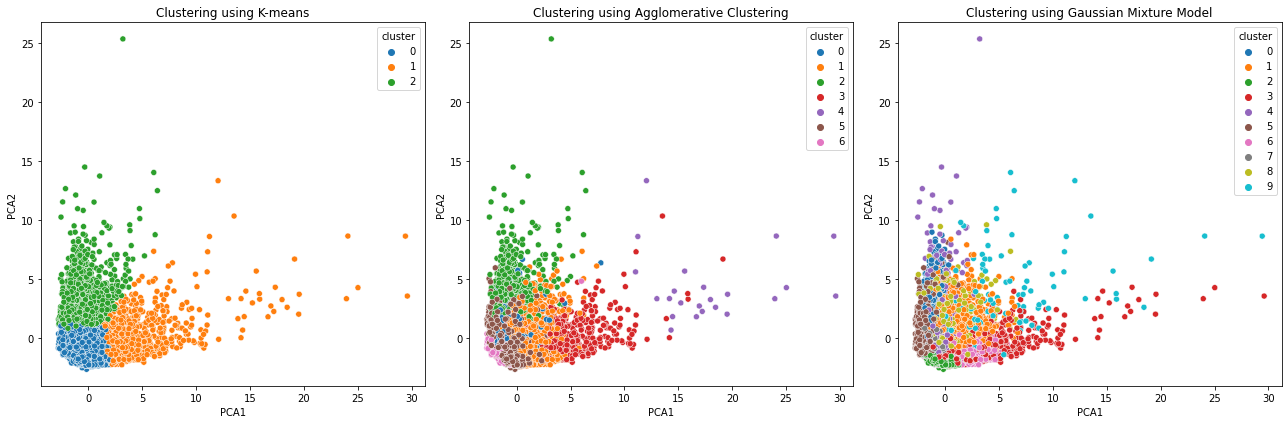

In [23]:
# Load your data into a DataFrame
data = df  # Replace with the path to your data file

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])

# K-means Clustering
kmeans_model = KMeans(n_clusters=3)
kmeans_labels = kmeans_model.fit_predict(scaled_data)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_labels})], axis=1)

# Agglomerative Clustering
agglo_model = AgglomerativeClustering(linkage="ward", n_clusters=7)
agglo_labels = agglo_model.fit_predict(scaled_data)
pca_df_agglo = pd.concat([pca_df, pd.DataFrame({'cluster': agglo_labels})], axis=1)

# Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=10)
gmm_labels = gmm_model.fit_predict(scaled_data)
pca_df_gmm = pd.concat([pca_df, pd.DataFrame({'cluster': gmm_labels})], axis=1)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter Plot for K-means Clustering
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette='tab10', ax=axes[0])
axes[0].set_title("Clustering using K-means")

# Scatter Plot for Agglomerative Clustering
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_agglo, palette='tab10', ax=axes[1])
axes[1].set_title("Clustering using Agglomerative Clustering")

# Scatter Plot for GMM
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_gmm, palette='tab10', ax=axes[2])
axes[2].set_title("Clustering using Gaussian Mixture Model")

plt.tight_layout()
plt.show()


## Proceeding with K-means clustering

## Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

## Dimensionality reduction

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682220,-1.076449
1,-1.138289,2.506491
2,0.969673,-0.383549
3,-0.873629,0.043165
4,-1.599433,-0.688578
...,...,...
8945,-0.359630,-2.016145
8946,-0.564379,-1.639138
8947,-0.926205,-1.810787
8948,-2.336550,-0.657960


## Choose the Number of Clusters (K)

In [27]:
#loading k means library
from sklearn.cluster import KMeans

In [28]:
#  plotting the Within-Cluster Sum of Squares (WCSS) against different values of K and 
# choosing the "elbow" point where the rate of decrease slows down

wcss = []  # Create an empty list to store the WCSS values

for i in range(1, 11):  # Loop through the number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i)  # Create a KMeans clustering model with 'i' clusters
    kmeans.fit_predict(pd.DataFrame(scaled_df))  # Fit the model and predict cluster assignments for the data
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list


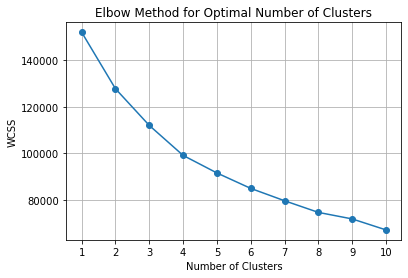

In [29]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))  # Set x-axis ticks to match the cluster range
plt.grid(True)

plt.show()


## Initialize cluster centers

In [30]:
kmeans_model=KMeans(3) #initializing the argument n_clusters=3, which indicates that we want to find 4 clusters in the data.

## Assign Data Points to Clusters

In [31]:
kmeans_model.fit_predict(scaled_df)

array([1, 0, 1, ..., 1, 1, 1])

In [32]:
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
# pca_df_kmeans now contains both the PCA-transformed features and the corresponding cluster labels. 
# This combined DataFrame can be used for further analysis, visualization, or interpretation of the clustered data.

## Visualizing the clustered dataframe

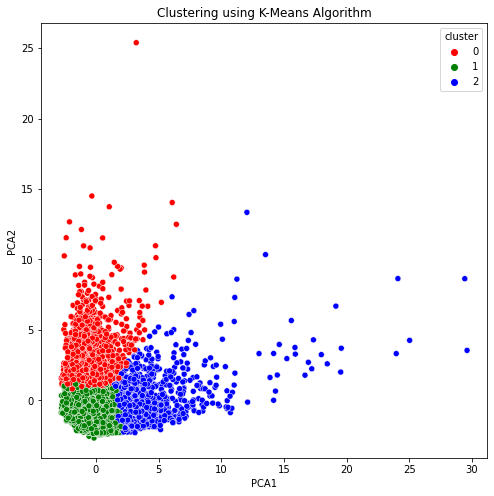

In [33]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

## Cluster Analysis

In [34]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3988.863449,0.958006,384.561835,248.599461,136.039812,3868.808238,0.232771,0.110925,0.144778,0.447157,12.386349,5.625548,6681.906415,3017.656683,1795.028942,0.033753,11.351284
1,799.878982,0.834788,502.369263,250.494159,252.196794,329.726996,0.463803,0.130766,0.344946,0.068300,1.210914,8.591937,3267.677489,907.460578,548.576559,0.155014,11.478859
2,2199.019371,0.981423,4235.875915,2699.269201,1537.086331,455.967683,0.948660,0.668994,0.739924,0.062880,1.524380,56.147882,7685.811351,4120.795611,1215.486146,0.300519,11.916867


In [35]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [36]:
cluster_df['Cluster'].value_counts()

1    6103
0    1596
2    1251
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Cluster', ylabel='count'>

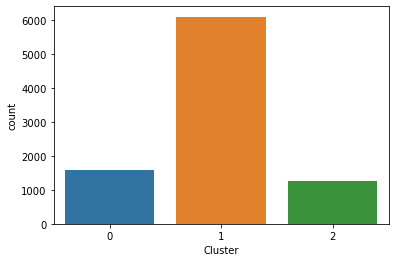

In [37]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

In [38]:
cluster_1_df = cluster_df[cluster_df["Cluster"] == 0]
cluster_2_df = cluster_df[cluster_df["Cluster"] == 1]
cluster_3_df = cluster_df[cluster_df["Cluster"] == 2]


## Balance statistics and analysis among clusters

Cluster 1 Balance Statistics:
 count     1596.000000
mean      3990.232159
std       2682.804001
min          4.382924
25%       1879.256517
50%       3460.591743
75%       5563.588143
max      16304.889250
Name: BALANCE, dtype: float64

Cluster 2 Balance Statistics:
 count    6103.000000
mean      800.043577
std       956.496654
min         0.000000
25%        57.187003
50%       424.994385
75%      1243.470602
max      5941.271179
Name: BALANCE, dtype: float64

Cluster 3 Balance Statistics:
 count     1251.000000
mean      2199.019371
std       2569.059916
min         12.423203
25%        359.149336
50%       1193.708983
75%       3144.566668
max      19043.138560
Name: BALANCE, dtype: float64


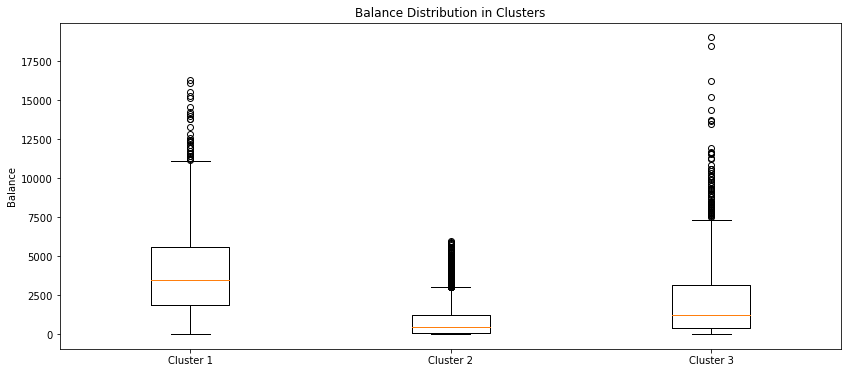

In [39]:

# Calculate summary statistics for the 'BALANCE' column in each dataframe
cluster_1_balance_stats = cluster_1_df['BALANCE'].describe()
cluster_2_balance_stats = cluster_2_df['BALANCE'].describe()
cluster_3_balance_stats = cluster_3_df['BALANCE'].describe()


# Print the summary statistics for each cluster
print("Cluster 1 Balance Statistics:\n", cluster_1_balance_stats)
print("\nCluster 2 Balance Statistics:\n", cluster_2_balance_stats)
print("\nCluster 3 Balance Statistics:\n", cluster_3_balance_stats)


# Create box plots to visualize the distribution of balance in each cluster
plt.figure(figsize=(14, 6))
plt.boxplot([cluster_1_df['BALANCE'], cluster_2_df['BALANCE'], cluster_3_df['BALANCE']],
            labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Balance Distribution in Clusters')
plt.ylabel('Balance')
plt.show()


 <span style='color:Blue'>*Observation*  </span>:


### Insights and Comparative Analysis:

#### Cluster Distribution

- Cluster 1: Moderate to High Balance Users (1596 customers)
- Cluster 2: Low Balance Users (6103 customers)
- Cluster 3: Varied Balance Users (1251 customers)

#### Cluster Characteristics

**Cluster 1: Moderate to High Balance Users**
- This cluster comprises customers who tend to maintain moderate to high balances in their accounts.
- They exhibit a wide variation in account balances, indicating diverse financial situations among these customers.
- Some customers in this cluster have balances that are considerably higher than others.
- This cluster represents individuals with varying financial goals and spending habits.

**Cluster 2: Low Balance Users**
- Customers in this cluster generally have lower account balances.
- The majority of customers fall within the low balance range.
- This cluster may include individuals who prefer to make specific purchases and pay off their credit card bills regularly.
- It represents customers who may prioritize minimizing their credit card balance.

**Cluster 3: Varied Balance Users**
- This cluster represents a mix of customers with different account balances.
- The balance distribution ranges from low to moderate, showcasing a diverse customer base.
- The wide range and significant standard deviation suggest varying financial behaviors within this cluster.
- This cluster comprises customers with diverse spending and saving patterns.

#### Mean Balance

**Cluster 1:**
- Mean Balance: 3990.23
- Customers in this cluster maintain moderate to high average balances in their accounts.

**Cluster 2:**
- Mean Balance: 800.04
- Customers in this cluster have lower average balances, indicating a tendency to keep lower amounts in their accounts.

**Cluster 3:**
- Mean Balance: 2199.02
- This cluster has moderate average balances, reflecting the mixed nature of the cluster's balance distribution.

#### Balance Spread

**Cluster 1:**
- Balance Spread: 2682.80
- Customers in this cluster show a wide variation in their account balances, highlighting different financial situations.

**Cluster 2:**
- Balance Spread: 956.50
- This cluster has a narrower balance spread compared to Cluster 1, suggesting more consistent account balances.

**Cluster 3:**
- Balance Spread: 2569.06
- The balance spread in this cluster is similar to that in Cluster 1, indicating diverse account balances.

#### Minimum and Maximum Balances

**Cluster 1:**
- Minimum Balance: 4.38
- Maximum Balance: 16304.89

**Cluster 2:**
- Minimum Balance: 0.00
- Maximum Balance: 5941.27

**Cluster 3:**
- Minimum Balance: 12.42
- Maximum Balance: 19043.14


## Purchase statistics and analysis among clusters

Cluster 1 PURCHASES Statistics:
 count    1596.000000
mean      384.777726
std       738.602099
min         0.000000
25%         0.000000
50%         0.000000
75%       463.377500
max      7194.530000
Name: PURCHASES, dtype: float64

Cluster 2 PURCHASES Statistics:
 count    6103.000000
mean      502.293502
std       593.368450
min         0.000000
25%        55.665000
50%       302.000000
75%       735.845000
max      5080.850000
Name: PURCHASES, dtype: float64

Cluster 3 PURCHASES Statistics:
 count     1251.000000
mean      4235.875915
std       4253.998576
min        498.170000
25%       2127.685000
50%       3095.960000
75%       4767.690000
max      49039.570000
Name: PURCHASES, dtype: float64


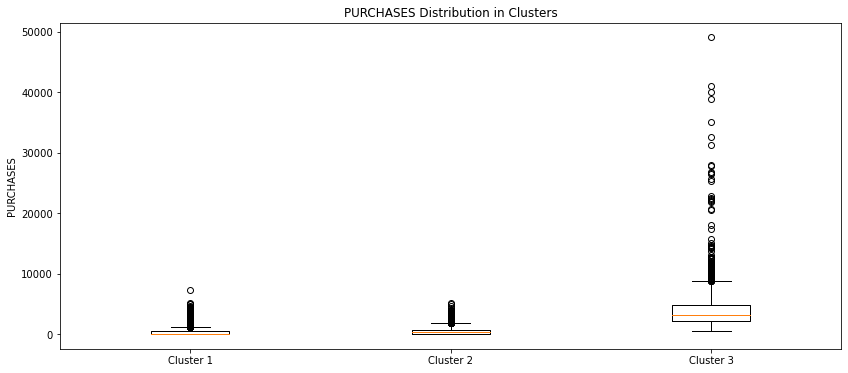

In [40]:
# Calculate summary statistics for the 'BALANCE' column in each dataframe
cluster_1_PURCHASES_stats = cluster_1_df['PURCHASES'].describe()
cluster_2_PURCHASES_stats = cluster_2_df['PURCHASES'].describe()
cluster_3_PURCHASES_stats = cluster_3_df['PURCHASES'].describe()


# Print the summary statistics for each cluster
print("Cluster 1 PURCHASES Statistics:\n", cluster_1_PURCHASES_stats)
print("\nCluster 2 PURCHASES Statistics:\n", cluster_2_PURCHASES_stats)
print("\nCluster 3 PURCHASES Statistics:\n", cluster_3_PURCHASES_stats)


# Create box plots to visualize the distribution of balance in each cluster
plt.figure(figsize=(14, 6))
plt.boxplot([cluster_1_df['PURCHASES'], cluster_2_df['PURCHASES'], cluster_3_df['PURCHASES']],
            labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('PURCHASES Distribution in Clusters')
plt.ylabel('PURCHASES')
plt.show()

<span style='color:Blue'>*Observation*  </span>:


### Insights and Comparative Analysis:

#### Cluster Distribution

- Cluster 1: Low Spenders (1596 customers)
- Cluster 2: Moderate Spenders (6103 customers)
- Cluster 3: High Spenders (1251 customers)

#### Cluster Characteristics

**Cluster 1: Low Spenders**
- Customers in this cluster have relatively low purchase activity.
- The majority of customers have low or no purchases, as indicated by the 25th and 50th percentiles.
- The mean purchase amount is 384.78, with a wide standard deviation of 738.60.
- This cluster represents customers who make minimal purchases or infrequent transactions.

**Cluster 2: Moderate Spenders**
- Customers in this cluster exhibit moderate spending behavior.
- The mean purchase amount is 502.29, with a standard deviation of 593.37.
- This cluster represents customers who make regular but moderate purchases.

**Cluster 3: High Spenders**
- Customers in this cluster are frequent and high-value spenders.
- The mean purchase amount is significantly higher at 4235.88, with a standard deviation of 4253.99.
- This cluster represents customers who engage in substantial spending and contribute to higher revenue for the business.

#### Minimum and Maximum Purchase Amounts

**Cluster 1:**
- Minimum Purchase: 0.00
- Maximum Purchase: 7194.53

**Cluster 2:**
- Minimum Purchase: 0.00
- Maximum Purchase: 5080.85

**Cluster 3:**
- Minimum Purchase: 498.17
- Maximum Purchase: 49039.57

#### Purchase Spread and Central Tendency

**Cluster 1:**
- Purchase Spread (Std Dev): 738.60
- Median Purchase (50th Percentile): 0.00

**Cluster 2:**
- Purchase Spread (Std Dev): 593.37
- Median Purchase (50th Percentile): 302.00

**Cluster 3:**
- Purchase Spread (Std Dev): 4253.99
- Median Purchase (50th Percentile): 3095.96

These insights provide a detailed understanding of the spending behaviors in each cluster, ranging from low spenders to high spenders, and the associated metrics that characterize their purchasing patterns. This analysis can guide marketing and promotional strategies tailored to the preferences of each customer segment.

## Cluster Statistics

In [41]:
cluster_1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1596.0,3990.232159,2682.804001,4.382924,1879.256517,3460.591743,5563.588143,16304.88925
BALANCE_FREQUENCY,1596.0,0.957980,0.115849,0.181818,1.000000,1.000000,1.000000,1.00000
PURCHASES,1596.0,384.777726,738.602099,0.000000,0.000000,0.000000,463.377500,7194.53000
ONEOFF_PURCHASES,1596.0,248.730163,574.758790,0.000000,0.000000,0.000000,226.397500,6678.26000
INSTALLMENTS_PURCHASES,1596.0,136.125050,349.359978,0.000000,0.000000,0.000000,70.455000,3887.00000
CASH_ADVANCE,1596.0,3869.733380,3388.648667,0.000000,1829.742749,3108.691798,4815.186398,47137.21176
PURCHASES_FREQUENCY,1596.0,0.232865,0.327960,0.000000,0.000000,0.000000,0.416667,1.00000
ONEOFF_PURCHASES_FREQUENCY,1596.0,0.110942,0.202485,0.000000,0.000000,0.000000,0.166667,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,1596.0,0.144869,0.280886,0.000000,0.000000,0.000000,0.166667,1.00000
CASH_ADVANCE_FREQUENCY,1596.0,0.447281,0.221284,0.000000,0.250000,0.416667,0.583333,1.50000


In [42]:
cluster_2_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6103.0,800.043577,956.496654,0.000000,57.187003,424.994385,1243.470602,5941.271179
BALANCE_FREQUENCY,6103.0,0.834815,0.268238,0.000000,0.727273,1.000000,1.000000,1.000000
PURCHASES,6103.0,502.293502,593.368450,0.000000,55.665000,302.000000,735.845000,5080.850000
ONEOFF_PURCHASES,6103.0,250.459669,477.513149,0.000000,0.000000,0.000000,302.215000,4900.000000
INSTALLMENTS_PURCHASES,6103.0,252.155471,395.046456,0.000000,0.000000,78.090000,361.195000,3200.000000
CASH_ADVANCE,6103.0,330.064953,654.424399,0.000000,0.000000,0.000000,342.095009,7894.578816
PURCHASES_FREQUENCY,6103.0,0.463741,0.379854,0.000000,0.083333,0.416667,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,6103.0,0.130759,0.218694,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,6103.0,0.344889,0.383388,0.000000,0.000000,0.166667,0.707143,1.000000
CASH_ADVANCE_FREQUENCY,6103.0,0.068330,0.106038,0.000000,0.000000,0.000000,0.090909,0.714286


In [43]:
cluster_3_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1251.0,2199.019371,2569.059916,12.423203,359.149336,1193.708983,3144.566668,19043.13856
BALANCE_FREQUENCY,1251.0,0.981423,0.073901,0.090909,1.000000,1.000000,1.000000,1.00000
PURCHASES,1251.0,4235.875915,4253.998576,498.170000,2127.685000,3095.960000,4767.690000,49039.57000
ONEOFF_PURCHASES,1251.0,2699.269201,3609.223061,0.000000,915.100000,1776.680000,3166.070000,40761.25000
INSTALLMENTS_PURCHASES,1251.0,1537.086331,1857.060772,0.000000,468.455000,1080.100000,1913.680000,22500.00000
CASH_ADVANCE,1251.0,455.967683,1320.891731,0.000000,0.000000,0.000000,138.213145,19513.47483
PURCHASES_FREQUENCY,1251.0,0.948660,0.115784,0.083333,0.916667,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,1251.0,0.668994,0.312712,0.000000,0.416667,0.750000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,1251.0,0.739924,0.328903,0.000000,0.583333,0.916667,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,1251.0,0.062880,0.133884,0.000000,0.000000,0.000000,0.083333,1.00000


<span style='color:Blue'>*Observation*  </span>:

### Characteristics, segmentation, and strategies for users in each cluster :

### Cluster 1: Prudent Savers

**Characteristics:**
- This cluster contains 1596 customers.
- These customers tend to maintain a moderate to high balance, with a mean balance of \$3990.23.
- They have a relatively low frequency of making purchases (mean frequency: 0.23).
- Their purchases are generally low in value, with a mean purchase amount of \$384.78.
- They occasionally make cash advances, but the amount is moderate (mean amount: \$3869.73).
- Credit limit ranges from moderate to high (mean: \$6684.53).
- Many customers in this cluster have low purchase and payment frequencies, and they rarely make one-off purchases.

**Segmentation:**
- These are cautious users who prioritize savings and manage their credit usage wisely.
- They may be older individuals or those with stable financial habits.

**Strategy:**
- Provide financial education resources to help users optimize their spending and credit usage.
- Encourage these customers to explore reward programs that align with their conservative spending approach.
- Offer credit limit increases to those who have been responsible in managing their balance and payments.

### Cluster 2: Balanced Spenders

**Characteristics:**
- This cluster contains 6103 customers.
- They maintain a relatively low balance (mean balance: \$800.04) and credit limit (mean limit: \$3267.55).
- Customers make frequent purchases (mean frequency: 0.46) with moderate to low purchase amounts (mean amount: \$502.29).
- They have a moderate credit utilization rate.
- These customers rarely make one-off purchases and tend to spread their purchases across installments.
- Cash advances are infrequent and low in amount (mean amount: \$330.06).

**Segmentation:**
- These users have a balanced approach to spending and credit usage.
- They likely use credit cards for daily expenses and avoid high-value transactions.

**Strategy:**
- Offer personalized rewards for frequent but moderate purchases, such as cashback or loyalty points.
- Provide budgeting tools to help users manage their credit utilization more effectively.
- Encourage responsible credit usage and timely payments.

### Cluster 3: Frequent High Spenders

**Characteristics:**
- This cluster contains 1251 customers.
- Customers in this cluster have a relatively high mean balance (\$2199.02) and credit limit (\$7685.81).
- They make frequent and high-value purchases (mean purchase amount: \$4235.88) with a strong purchasing frequency (mean frequency: 0.95).
- One-off purchases are common, and they also engage in purchases through installments.
- These users tend to have a higher credit limit and maintain a higher credit utilization rate.
- Cash advances are infrequent and low in amount (mean amount: \$455.97).

**Segmentation:**
- These users are confident spenders who make substantial purchases and utilize their credit limit effectively.

**Strategy:**
- Provide premium rewards programs for high-value transactions to encourage continued spending.
- Offer credit limit increases to accommodate their high purchasing frequency.
- Highlight exclusive benefits and offers for these users to enhance their loyalty.


## Model building for classification of clusters

In [44]:

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score,classification_report

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

In [45]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]


In [46]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [47]:
### both will have same shape
X_train.shape, y_train.shape

((6265, 17), (6265, 1))

In [48]:
### both will have same shape
X_test.shape, y_test.shape

((2685, 17), (2685, 1))

In [49]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
#Confusion_Matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 415   34   14]
 [  36 1735   39]
 [  12   36  364]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       463
           1       0.96      0.96      0.96      1810
           2       0.87      0.88      0.88       412

    accuracy                           0.94      2685
   macro avg       0.91      0.91      0.91      2685
weighted avg       0.94      0.94      0.94      2685



### Conclusion:

- In pursuit of our objective, we have successfully conducted a comprehensive clustering analysis on credit card holders, leading to the identification of distinct customer segments. Through this process, we have gained valuable insights into the diverse behavioral patterns exhibited by credit card users. Each cluster represents a unique profile of credit card utilization, shedding light on the various ways customers interact with their credit cards.

- By achieving our objective of segmentation, we have equipped businesses with a powerful tool to refine their marketing strategies. The formation of well-defined customer clusters enables targeted and tailored approaches, allowing companies to effectively address the specific needs, preferences, and spending behaviors of each group. This, in turn, leads to heightened customer satisfaction, increased engagement, and ultimately, improved overall profitability.

- Our accomplishment is further underscored by the successful implementation of a robust clustering model, which adeptly categorizes users into meaningful clusters. This model serves as a pivotal resource for businesses seeking to optimize their customer relationship management strategies. By leveraging this model, companies can foster stronger customer relationships, streamline their offerings, and unlock new avenues for growth and innovation.

In conclusion, this clustering analysis has not only met its intended objective but has also laid the foundation for data-driven decision-making and strategic advancements within the realm of credit card management. As businesses capitalize on the insights gleaned from these customer clusters, they are poised to embark on a journey of enhanced competitiveness and prosperity in today's dynamic marketplace.

## Thank you for reading till the End.

### Raviteja Padala
https://www.linkedin.com/in/raviteja-padala/